In [1]:
import pandas as pd

In [2]:
import ast


df = pd.read_csv("llama_confidence_benchmark_mmlu.csv")
df
# list_from_string = ast.literal_eval(df['log_probs'][0])

# list_from_string

,generated,log_probs,linear_probs,correct_answer
0,"[' \n', 'Answer', ':', ' C', ',', ' Confidence...","[-1.3551461696624756, 0.0, 0.0, 0.0, 0.0, 0.0,...","[25.79095931383204, 100.0, 100.0, 100.0, 100.0...",C
1,"[' Do', ' not', ' add', ' any', ' text', ' to'...","[-3.232952356338501, -0.30670833587646484, -1....","[3.944088318622742, 73.58651950881857, 15.6591...",B
2,"[' You', ' can', ' express', ' the', ' confide...","[-3.8879573345184326, -1.9068623781204224, -1....","[2.048715172352737, 14.854573652066616, 19.394...",D
3,"[' Answer', ':', ' A', ',', ' Confidence', ':'...","[-1.4309542179107666, 0.0, -1.1106361150741577...","[23.90806782984922, 100.0, 32.9349390314852, 1...",C
4,"[' \n', 'Answer', ':', ' B', ',', ' Confidence...","[-1.547785997390747, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[21.2718411978085, 100.0, 100.0, 100.0, 100.0,...",B
...,...,...,...,...
995,"[' Confidence', ':', ' ', '0', '.', '92', '\n'...","[-1.6430426836013794, 0.0, 0.0, -0.42870065569...","[19.339071941340492, 100.0, 100.0, 65.13548793...",B
996,"[' \n\n', 'Answer', ':', ' B', ',', ' Confiden...","[-2.1588363647460938, 0.0, 0.0, -0.34844458103...","[11.545939552267425, 100.0, 100.0, 70.57850278...",A
997,"[' Answer', ':', ' C', ',', ' Confidence', ':'...","[-0.9392414093017578, 0.0, -0.825939416885376,...","[39.09242744246419, 100.0, 43.782350042481234,...",A
998,"[' \n', 'Answer', ':', ' B', ',', ' Confidence...","[-1.6871663331985474, 0.0, 0.0, -0.28115010261...","[18.504313235780153, 100.0, 100.0, 75.49150122...",B


In [3]:
correct_answers_list = []
predicted_answer_list = []
logprob_list = []
linear_prob_list = []
llm_confidence_list = []


def find_letter_in_list(lst):
    # Define the letters to search for
    letters_to_find = {'A', 'B', 'C', 'D'}
    
    # Loop through the list with index
    for index, value in enumerate(lst):
        # Check if the value (stripped of spaces) is one of the letters
        if value.strip() in letters_to_find:
            return value.strip(), index  # Return the found letter and its index
    
    # If no matching letter is found, return None
    return None, -1

import re

def extract_confidence(gen_list):
    generated_text = "".join(gen_list)
    
    # Regular expression to match "Confidence: <value>"
    match = re.search(r'Confidence:\s*(\d+(\.\d+)?)', generated_text)
    
    if match:
        confidence_value = match.group(1)
        return confidence_value
    else:
        # print(generated_text)
        return None

# Test case
# print(extract_confidence(['D', ')', ' ', '451', ' degrees', '\n', 'Conf', 'idence', ':', ' ', '0', '.', '9']))

for i, row in df.iterrows():
    # print(i)
    generation = ast.literal_eval(df['generated'][i])
    log_probs = ast.literal_eval(df['log_probs'][i]) 
    correct_answer = df['correct_answer'][i]
    linear_prob = ast.literal_eval(df['linear_probs'][i])

    llm_confidence = extract_confidence(generation)
    predicted_answer = find_letter_in_list(generation)[0]


    if predicted_answer is None or llm_confidence is None:
        # print(generation)
        continue 

    llm_confidence_list.append(float(llm_confidence))

    predicted_answer_list.append(predicted_answer)
    correct_answers_list.append(correct_answer)
    logprob_list.append(log_probs[find_letter_in_list(generation)[1]])
    linear_prob_list.append(linear_prob[find_letter_in_list(generation)[1]])
new_df = pd.DataFrame({
    'correct_answer': correct_answers_list,
    'predicted_answer': predicted_answer_list,
    'logprob': logprob_list,
    'linear_prob': linear_prob_list,
    'confidence': llm_confidence_list
})

new_df

new_df[new_df['confidence'] > 0.7]
import numpy as np
new_df['llm Confidence'] = np.where(new_df['confidence'] > 0.7, 1, 0)

Frequency of Confident Correct Answers: 558
Frequency of Not Confident Correct Answers: 11
Frequency of Confident Incorrect Answers: 198
Frequency of Not Confident Incorrect Answers: 4


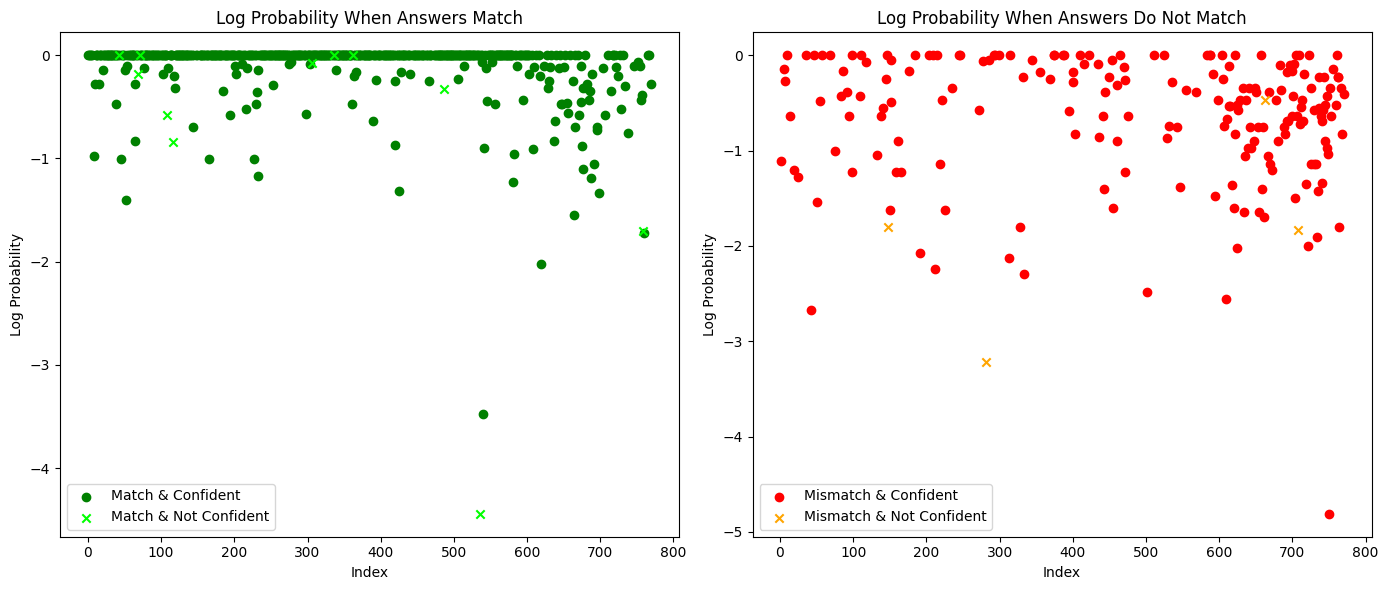

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming new_df is already created with 'correct_answer', 'predicted_answer', 'logprob', and 'llm Confidence' columns

# Filter categories
match_confident = new_df[(new_df['correct_answer'] == new_df['predicted_answer']) & (new_df['llm Confidence'] == 1)]
match_not_confident = new_df[(new_df['correct_answer'] == new_df['predicted_answer']) & (new_df['llm Confidence'] == 0)]
mismatch_confident = new_df[(new_df['correct_answer'] != new_df['predicted_answer']) & (new_df['llm Confidence'] == 1)]
mismatch_not_confident = new_df[(new_df['correct_answer'] != new_df['predicted_answer']) & (new_df['llm Confidence'] == 0)]

# Calculate frequencies
freq_match_confident = len(match_confident)
freq_match_not_confident = len(match_not_confident)
freq_mismatch_confident = len(mismatch_confident)
freq_mismatch_not_confident = len(mismatch_not_confident)

# Print frequencies
print("Frequency of Confident Correct Answers:", freq_match_confident)
print("Frequency of Not Confident Correct Answers:", freq_match_not_confident)
print("Frequency of Confident Incorrect Answers:", freq_mismatch_confident)
print("Frequency of Not Confident Incorrect Answers:", freq_mismatch_not_confident)

# Create scatter plot
plt.figure(figsize=(14, 6))

# Plot when answers match
plt.subplot(1, 2, 1)
plt.scatter(match_confident.index, match_confident['logprob'], color='green', marker='o', label='Match & Confident')
plt.scatter(match_not_confident.index, match_not_confident['logprob'], color='lime', marker='x', label='Match & Not Confident')
plt.xlabel("Index")
plt.ylabel("Log Probability")
plt.title("Log Probability When Answers Match")
plt.legend()

# Plot when answers do not match
plt.subplot(1, 2, 2)
plt.scatter(mismatch_confident.index, mismatch_confident['logprob'], color='red', marker='o', label='Mismatch & Confident')
plt.scatter(mismatch_not_confident.index, mismatch_not_confident['logprob'], color='orange', marker='x', label='Mismatch & Not Confident')
plt.xlabel("Index")
plt.ylabel("Log Probability")
plt.title("Log Probability When Answers Do Not Match")
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


##### Observations

As seen in the results above, LLMs, specifically GPT3.5, are not a reliable source to assess the confidence in its own answer. 

The LLM only categorized five answers as not confident, and claimed high confidence in over 98% of the incorrect answers.

This points us to leverage alternative directions to such as Logprobs to assess a confidence of a model, and flag potentially incorrect responses